#**Clustering**
#**finding patterns in a sea of data**


![](https://drive.google.com/uc?export=view&id=1mhtihfAws6lqJ7G1682axCDulI7vLvKm)

Clustering is an unsupervised machine learning technique whose task is to assign instances (i.e. rows) of data to clusters of groups who share some common feature (or set of features).

Clustering is similar to classification (a supervised learning task) but it works with unlabeled data. Clustering has a wide variety of applications from grouping DNA sequences, customer segmentation (understanding the traits of purchases or shopping behaviors) and recommender systems (like IMDB or Amazon).


#**Unlabeled Data**
Because a majority of data is unlabeled, clustering is the go-to technique to first understand the characteristics and perhaps hidden patterns and structure in the data. Other than visualization, clustering is usually the first tool out of the box to explore an unlabeled dataset.

#**Visualizing, the first step**
As just mentioned, when you have an unlabeled dataset, your first task (assuming you already know the goals of the project) is to visualize the data to get some kind bearing. The great thing about visualizing the data first is that it forces you (or your team) to describe the intent of the project and what variables/attributes you are interested in. Many people will say, “let's do some machine learning on that data” without knowing the goals or what they expect to find. As of now, there is no analysis technique that can consume arbitrary data and do something meaningful with it.

There's a lot of issues when it comes to visualizing a raw dataset. Since displays have only the capacity to draw in 2D (even when we draw in '3D' we are projecting down to a 2D surface), the best we can do is to pick a few dimensions (usually 2) on which to visualize. If a dataset has 20 attributes, time needs to be invested into understanding what to visualize. You can't just give raw data to a scatter plot, for example, without telling it what variables (e.g. 'x' and 'y' axes for 2D plot) to use.

#**Data Preparation**
The following code builds a pandas dataframe from a small dataset. We will use this dataset to illustrate some of the techniques we will explore.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

def build_dataset():
  p = 'canon.csv'
  # Importing the dataset
  df = pd.read_csv(p)
  keep = ['a', 'b', 'c', 'd', 'e', 'f']
  return df[keep]
data_df = build_dataset()
print(data_df.head(5))

          a    b         c         d         e         f
0  0.359148  0.2  0.343460  0.125000  0.129137  1.000000
1  0.109290  1.0  0.728682  0.646739  0.767139  0.684211
2  0.598361  0.2  0.054264  0.135870  0.092199  0.578947
3  0.191257  1.0  0.604651  0.510870  0.542553  0.736842
4  0.136612  1.0  0.857881  0.565217  0.634752  0.789474


As you can see, the column names offer no help (on purpose). How would you try to visualize this?

```
    a    b         c         d         e         f
0  0.359148  0.2  0.343460  0.125000  0.129137  1.000000
1  0.109290  1.0  0.728682  0.646739  0.767139  0.684211
2  0.598361  0.2  0.054264  0.135870  0.092199  0.578947
3  0.191257  1.0  0.604651  0.510870  0.542553  0.736842
4  0.136612  1.0  0.857881  0.565217  0.634752  0.789474
```

**Pairwise Plots**

One exploratory technique is to limit the attributes of interests and then do pairwise combinations of them and visualize (using a scatter plot) of each combination. This could reveal patterns between different pairs of attributes.

Matplotlib does not offer an easy way (you need to build your own solution), but Pandas [does](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html). It is quite easy to do this:

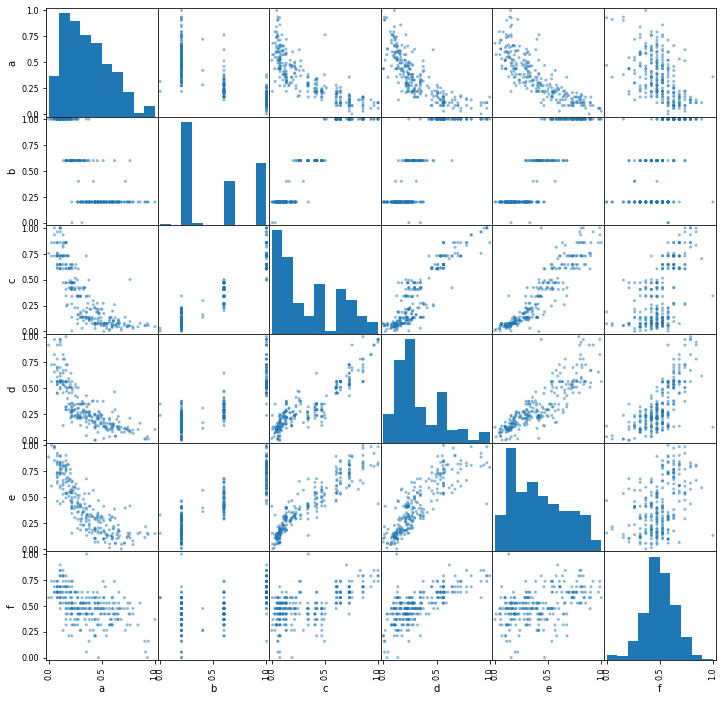

In [2]:
def pair_wise_plots(df):
  axes = pd.plotting.scatter_matrix(df, figsize=(12,12))
  
pair_wise_plots(data_df)

###**Pairwise Plotting**

![](https://drive.google.com/uc?export=view&id=1cU855wx4mwnVmSeoGvQLc8maIKWTTrgh)

The pairwise plot creates scatter plots for each combination of the columns (the reason why you will usually want to drop some of the columns).
Note that the visualization is essentially symmetric. A few things to point out.

**Distributions**

The graphs down the diagonal are the distributions of the different features/attributes. 
* attribute b has 3 modes
* attribute f looks close to being normally distributed.

**Pair-wise correlations**

* Attribute a demonstrates a linear relationship with c, d, e
* Attribute f seems to have no 'visible' relationship with the other columns

It helps to look at this data while being 'blinded' by anonymity. Having some domain information about the dataset is clearly useful, but sometimes when you are given data that you have no expertise in, it feels very much like this process.

###**Finding Clusters**

Do any column pairs seem to have some interesting 'clusters' of points? A cluster is a group of points that seem to share a common characteristic. For example if you were to cluster dogs using weight and height, small dogs (like dachshunds and chihuahaus) may be in one group, while large dogs (e.g. collies and hounds), would be in a different group. Some dogs, like terriers could belong in either group. How would you decide?

So if you were wanting to create an algorithm for clustering points/objects/dogs how and where would you start?




#**An Algorithmic Overview**

Clustering is the process of dividing data points into homogeneous classes or clusters. When we have a collection of points/objects, we want to put objects into groups based on similarity:

* Objects in the same group are as similar as possible
* Objects in different group are as dissimilar as possible

#**Distance Metric**

Since clusters are defined based on having 'similar' objects, we need to create a metric to measure similarity. However, instead of trying to maximize a similarity metric we can minimize a distance metric. One of the most basic distance metrics (as discussed in another lesson) is euclidean distance.

Given two points (p and q) both with two attributes (x,y), the distance between those pointsis defined as $\sqrt{(p_x-q_x)^2+(p_y-q_y)^2}$.

 If the points contain n dimensions, the general formula becomes: $d(p,q) = \sqrt{\sum_{i=1}^n (q_i-p_i)^2}$

#**Distance with Cluster Centers (or Centroids)**


![](https://drive.google.com/uc?export=view&id=1xOqZg1qpN9gh2F1XaQHK0JbIEH_dtHcf)

It's not enough to measure distances between points in the dataset; we need to define cluster centers as a way to mathematically represent the
center. It is from this center object (aka point) (a virtual point in the dataset) that all the other points in the cluster will be measured.

So each cluster will be 'measured' as the sum of squared distances (similar to the SSE measurement in statistics) between the points in the cluster and the center. Looking at the diagram, $D_{C1}$ is the sum of the distances between each point and the cluster center $C_1$. This distance is also called the ***intra*** cluster distance.

If you look closely, you'll see it's the square of the euclidean distance. This helps with penalizing outliers and objects/points far from the center.

With that in place, let's discuss a very common clustering algorithm: K-means.

#**K-Means Clustering**
One of the popular clustering algorithms is K-means. The algorithm essentially works like this:
1. Clusters the data into k groups
2. Select k points at random as cluster centers.
3. Assign objects to their closest cluster center according to the distance metric.
4. Calculate the new centroid (i.e. mean) of all objects in each cluster.
5. Repeat steps 2, 3 and 4 until the same points are assigned to each cluster in consecutive rounds.

#**Objective Function**

![](https://drive.google.com/uc?export=view&id=14xJQkihYsfgJzUkEhtO41bGxilE5D6p5)

Essentially, we are minimizing the cost of the sum of **intra** cluster distances. This is the **objective** function for the machine learning algorithm. This calculation is called **inertia** and we want to minimize it.

Please take the time to digest the above diagram. The values dc1c3, dc1c2, dc2c3 are the **inter** cluster distances. The objective function can be summarized as:

![](https://drive.google.com/uc?export=view&id=1ExJSVNjJO7QHP57hUQFpOHrDL7ttad9C)


This metric is also commonly written as $SSE = \sum_{i=1}^k \sum_{x\epsilon C_i}dist(c_i,x)^2$ where $dist$ is the
euclidean (L2) distance between the cluster center and a point in the same cluster. For clustering documents, perhaps using $tf•idf$ scores, one could replace it with the cosine distance.

```
What is the issue with this clustering algorithm?
k needs to be known (the number of clusters)
```

**What about k?**

The BIG (and interesting) question to ask is 'how do we figure out how many clusters to look for?" The algorithm needs a **k**!

The first tactic we already discussed: visualize all the possibilities. That won't work with high dimensional data or clusters that depend on more than 2 attributes. You can do dimensional reduction (another algorithm; another lesson) to find the two attributes that explain the most amount of variance between the data instances.

However, another technique is to use the model's inertia value. We won't necessarily pick the lowest inertia value across all *K* values, we want the lowest inertia for the least amount of clusters. After all having *K* equal the number of data points, would have a very low inertia score!

#**Data Preparation, taking our blinders off**
The dataset we have been working with is the same dataset from the normalization lesson: the information on 261 different cars. Let's reload the un-anonymized dataset:


In [3]:
def build_dataset(as_is=False):
  p = 'clean_cars.csv'
  # Importing the dataset
  df = pd.read_csv(p)
  if as_is:
    return df
    
  drop = ['brand', 'year'] #, 'cylinders']
  return df[df.columns.difference(drop)]

data_df = build_dataset()
print(data_df.head(5))

   cubicinches  cylinders        hp       mpg  time-to-60  weightlbs
0     0.343460        0.2  0.125000  0.359148    1.000000   0.129137
1     0.728682        1.0  0.646739  0.109290    0.684211   0.767139
2     0.054264        0.2  0.135870  0.598361    0.578947   0.092199
3     0.604651        1.0  0.510870  0.191257    0.736842   0.542553
4     0.857881        1.0  0.565217  0.136612    0.789474   0.634752


A few domain specific notes to the columns.
* This dataset is already cleaned (the same from the normalization lesson)
* We dropped the column brand since this is a categorical attribute that will be useful to see if any of the other attributes can help determine the brand of the car.
* We dropped the year column since this value isn't intrinsic to the engineering of the car.
* Another candidate for dropping is the 'number of cylinders'. Almost all the cars are 4,6,or 8 cylinders. This natural cluster, may influence the clusters.
* A good (and required) analysis is to experiment with keeping/dropping these from the cluster analysis.

It's been too many words, let's start coding! Scikit-learn has a K-means algorithm.

Sklearn's k-means algorithm requires that the data is an array of points. As an example for data with three attributes, 4 data points (labeled p1 - p4) might look like:

```
data = [(1.0, 1.4, 2.3), (2.0, 0.5, -1.0), (3.3, 4.0, -1.0), (0,0,0)]
#              p1               p2                p3            p4
```

For our running example, let's convert the pandas dataframe into a correctly formatted array of values (n-dimensional points of data) using numpy:

In [4]:
def convert_to_points(df):
    p = []
    for c in df.columns:
      pc = df[c]
      p.append(pc)

    points = np.stack(p, axis=1)
    return points

points = convert_to_points(data_df)
print(data_df.head(5))
print(points[0:5,:])

   cubicinches  cylinders        hp       mpg  time-to-60  weightlbs
0     0.343460        0.2  0.125000  0.359148    1.000000   0.129137
1     0.728682        1.0  0.646739  0.109290    0.684211   0.767139
2     0.054264        0.2  0.135870  0.598361    0.578947   0.092199
3     0.604651        1.0  0.510870  0.191257    0.736842   0.542553
4     0.857881        1.0  0.565217  0.136612    0.789474   0.634752
[[0.34345974 0.2        0.125      0.35914829 1.         0.12913712]
 [0.72868217 1.         0.64673913 0.10928962 0.68421053 0.76713948]
 [0.05426357 0.2        0.13586957 0.59836066 0.57894737 0.09219858]
 [0.60465116 1.         0.51086957 0.19125683 0.73684211 0.54255319]
 [0.85788114 1.         0.56521739 0.13661202 0.78947368 0.63475177]]


```
Did you forgot how np.stack works?
np.stack rearranges the data based on the axis parameter.
```

For many problems in data science, a big part of the pipeline is converting your data from its native format to the format required to use libraries like sci-learn, pandas, matplotlib, etc. Pay close attention to how each of the different libraries we use require the data to be slightly altered.

It's also possible that (some) pandas data frame can be passed into the algorithm. However, this helps us separate the need to use pandas with sklearn.


#**Model Building**
Once we have our data as a list of points, we can use the KMeans class:

```
km = KMeans(n_clusters=K,   # how many clusters
            max_iter=300,   # iterate 300 times, for a 'single run'
            n_init=100,     # run it 100 times, picking the best one
            init='random',  # pick random centers (provide your own, 'k-means++')
            random_state=42, # pick None to be different each time
            tol=0.0001)      # when to declare convergence between two consecutive iterations
```

There are many [parameters](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) that can be configured for KMeans. However, the above is a good starting point.

Once that is done, you create/train the model using the *fit* method. But instead of calling *transform*, we use *predict* instead. There is still a *transform* method, but it is used to calculate the distance between cluster centers and the incoming data. The *predict* will generate which cluster each data sample is assigned to.

In [5]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt

def cluster_points(points, K=6):
    km = KMeans(n_clusters=K,   # how many clusters
                max_iter=300,   # iterate 300 times, for a 'single run'
                n_init=100,     # run it 100 times, picking the best one
                init='random',  # pick random centers (provide your own, 'k-means++')
                random_state=42,# pick None to be different each time
                tol=0.0001)     # when to declare convergence between two consecutive iterations

  
  # points needs to be like
  # [x1,y1], [x2, y2], etc
  
  # build the model
    km.fit(points)
  
    centers = km.cluster_centers_
    print(centers)
  
    # pass the same data through the model,
    # predict will assign the point to a label (cluster number)
    labels = km.predict(points)
    return km, labels
    
km, labels = cluster_points(points)
print(len(km.cluster_centers_), set(labels))

[[0.3821446  0.60357143 0.29512811 0.28068891 0.44924812 0.46659308]
 [0.14249058 0.19677419 0.23974404 0.39892686 0.47877759 0.27042343]
 [0.06646569 0.2        0.1215781  0.63448695 0.44931774 0.12635168]
 [0.65854559 1.         0.53238687 0.15897179 0.61761547 0.6857963 ]
 [0.07807309 0.21428571 0.06677019 0.62314598 0.16917293 0.21671579]
 [0.85887498 1.         0.78637124 0.09773014 0.7145749  0.80729451]]
6 {0, 1, 2, 3, 4, 5}


**Centers and Labels**

As you can see, we have six cluster centers. Additionally, we also have an array (labels) that label each row as to what cluster they were assigned to. In this case the 'labels' are simply the values 0 .. K-1.

**A cleaning note**

Usually, things don't go so smoothly. But we spent a lot of time cleaning the cars dataset to make this step pain-free. Take a look at another dataset (to be used in the lesson component).

In [8]:
def unclean_data_demo():
  p = 'anon.csv'
  tmp_df = pd.read_csv(p)[['a','b','c']]
  print(tmp_df.head(5))
  km, lbls = cluster_points(tmp_df)

unclean_data_demo()

          a         b         c
0  0.615367  0.505843  0.437702
1 -0.619346  1.711555 -0.376951
2 -0.749748  1.969948  0.023749
3  0.849187 -1.291490  1.310602
4 -0.757987  1.826063 -0.582550


ValueError: ignored

###**Data Preparation (a reprise)**

What happened?

```
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
```

That error NaN is saying that some of the columns in our dataset don't have values. We can clean these rows up by just removing them. Add the following line to make it all work

```
tmp_df = tmp_df.dropna()
km, lbls = cluster_points(tmp_df)
```

Another note is, we are passing the dataframe directly to cluster_points. This won't always work, so buyer beware.

In [9]:
def unclean_data_demo():
  p = 'anon.csv'
  tmp_df = pd.read_csv(p)[['a','b','c']]
  print(tmp_df.head(5))
  tmp_df = tmp_df.dropna()
  km, lbls = cluster_points(tmp_df)

unclean_data_demo()

          a         b         c
0  0.615367  0.505843  0.437702
1 -0.619346  1.711555 -0.376951
2 -0.749748  1.969948  0.023749
3  0.849187 -1.291490  1.310602
4 -0.757987  1.826063 -0.582550
[[ 0.38852021  0.5088741   1.17611156]
 [ 0.62825614 -0.99638394  0.89756525]
 [ 0.30293257  0.51277466  0.25809571]
 [-0.91951084  1.59456004 -0.70702486]
 [ 0.64269051 -1.04940283 -0.25543002]
 [-0.83728869  1.69775503  0.42092543]]


#**Hyper Parameters**
As you noticed, there are many parameters that you can adjust for building KMeans clustering models. Most of the defaults are good bets and you can [read](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) the documentation as well.

KMeans will iterate **max_iter** times to build a model. Then it will run the whole thing over again **n_init** times -- picking the very best 'fit'. The other two points to make:
* ***fit*** was called to build the ML model.
* ***predict*** was called to pass the data through the model.

The *predict* method will take a point (or a set of points) and predict a label (e.g cluster center) for that point.

#**Drawing our clusters**
Printing out both the centers and the set of labels only goes so far (it's pretty boring too). It would be easier to see what's happening by plotting the centers, along with the data. Add the following code to the same cell with plot_kmeans:

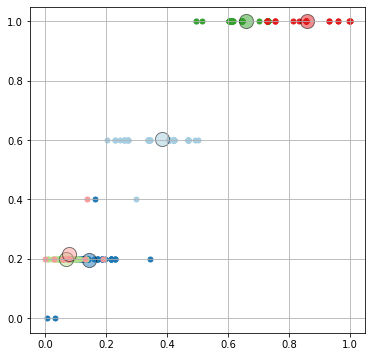

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_kmeans(points, centers, labels, x0=0, x1=1, columns=None):

    K = len(centers)
    colors= ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
    cmap = matplotlib.colors.ListedColormap(colors)
    if len(colors) <= K:
      cmap = cm.Dark2

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
    for c_id in range(0, K):
        mask = labels == c_id
        c = cmap(c_id)
        axes.scatter(points[mask][:, x0], points[mask][:, x1], color=c, s=25)
        # mark the center
        axes.scatter(centers[c_id, x0], centers[c_id, x1], color=c, s=200, alpha=0.5,
edgecolor='black')
        
    if columns is not None:
      axes.set_xlabel(columns[x0], fontsize=18)
      axes.set_ylabel(columns[x1], fontsize=16)
    axes.grid()

plot_kmeans(points, km.cluster_centers_, labels)


Once that is done, just add the call to the plot_kmeans function

```plot_kmeans(points, km.cluster_centers_, labels)```

```
Do you understand points[mask][:,x0] in the above code block?
mask is an array of booleans
points[mask] is all the points where the mask == True
points[mask][: , x0]
of those points select all the rows (i.e. :, ) and column x0
this syntax is only available with numpy arrays
```

#**Finding K**


![](https://drive.google.com/uc?export=view&id=1zGEMfkWPd9vTFXcrZ6cgpg1oTjbvWdLe)

Your plot should be very similar to what is shown here. Each cluster is colored and the cluster centers are shown as bigger circles near/in each cluster.

Our function uses a default K=6 for its cluster count, but what is the optimal K to choose?

We can take advantage of the objective function that KMeans is trying to minimize: The inertia or sum of intra cluster distances. Go ahead and add this line of code after you plot it:

```print(km.inertia_)```

We can use this value of inertia along with the value of K and plot the resulting points.

[[0.18004706 0.31160221 0.20450997 0.45440401 0.43820878 0.27553842]
 [0.71159561 0.98       0.60509511 0.14402322 0.6375     0.71842125]]
[[0.3803278  0.60689655 0.29628936 0.28052572 0.45009074 0.46563063]
 [0.1035178  0.19844961 0.17096394 0.52277816 0.43288454 0.20359404]
 [0.73112648 1.         0.62411868 0.13594742 0.65362731 0.73075602]]
[[0.38414424 0.61052632 0.29605263 0.28051002 0.44967682 0.46749023]
 [0.14436605 0.19677419 0.23991935 0.39945568 0.47283531 0.27519446]
 [0.06714546 0.20294118 0.11013427 0.63166988 0.39705882 0.140606  ]
 [0.73112648 1.         0.62411868 0.13594742 0.65362731 0.73075602]]
[[0.3821446  0.60357143 0.29512811 0.28068891 0.44924812 0.46659308]
 [0.66593535 1.         0.54511895 0.15316012 0.62562066 0.68252375]
 [0.14436605 0.19677419 0.23991935 0.39945568 0.47283531 0.27519446]
 [0.87749589 1.         0.80187747 0.10059613 0.71291866 0.83726897]
 [0.06714546 0.20294118 0.11013427 0.63166988 0.39705882 0.140606  ]]
[[0.3821446  0.60357143 0.2951

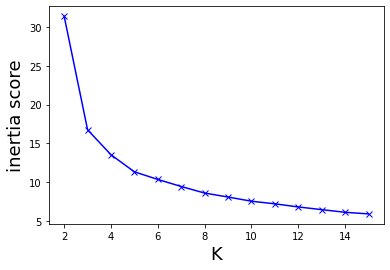

In [12]:
def plot_scores(scores, y="inertia score"):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    axes.plot(scores[:, 0], scores[:, 1], color='blue', marker='x')
    axes.set_ylabel(y, fontsize=18)
    axes.set_xlabel('K', fontsize=18)

def get_inertias(points):
  scores = []
  for k in range(2, 16):
     km, labels = cluster_points(points, K=k)
     scores.append((k, km.inertia_))
  return np.array(scores)

inertia_scores = get_inertias(points)
plot_scores(inertia_scores)

#**The Trick is in the Elbow**


![](https://drive.google.com/uc?export=view&id=1tXaDZZQR4rXcDaduKbQJiFoGT11RixTw)

When looking at the plot of inertia vs K, you don't want the lowest inertia score, you want the smallest number of clusters for the best inertia.

Looking at the graph, k=3 (as well as k=4) is such a point. It's also called the 'elbow' method, because you are looking at where the graph bends (like an elbow).

![](https://drive.google.com/uc?export=view&id=1pCTt8l4oQVZaA_FDmvay4NrdJFkTRfRK)

The next image (generated using a different dataset) shows that both 3 and 4 are good candidates for K and the 'elbow' is bit more pronounced.

The issue with the 'elbow' method is that you need to visualize it.


#**Silhouette Scores**

Another metric is called the silhouette coefficient. It's more computationally complex (as the inertia score is already calculated for us). It is calculated for each data instance. The Silhouette Coefficient measures how closely related an object is to its own cluster against the other clusters. For point i, the score is as follows:

 $S_i = (x_i-y_i)/max(xi,yi)$

* $x_i$ is the mean distance to the point of the next closest cluster
* $y_i$ is the mean intra cluster distance between $i$ and other points in the same cluster

The score can range from -1 to +1.
* +1: tight, well separated clusters: points are part of the correct cluster
* 0: mean of clusters are indifferent
* -1: sprawling, overlapping clusters: points are assigned to the wrong cluster

Let's run the following code to plot the silhouette scores. *What value do you think K should be?*


[[0.18004706 0.31160221 0.20450997 0.45440401 0.43820878 0.27553842]
 [0.71159561 0.98       0.60509511 0.14402322 0.6375     0.71842125]]
[[0.3803278  0.60689655 0.29628936 0.28052572 0.45009074 0.46563063]
 [0.1035178  0.19844961 0.17096394 0.52277816 0.43288454 0.20359404]
 [0.73112648 1.         0.62411868 0.13594742 0.65362731 0.73075602]]
[[0.38414424 0.61052632 0.29605263 0.28051002 0.44967682 0.46749023]
 [0.14436605 0.19677419 0.23991935 0.39945568 0.47283531 0.27519446]
 [0.06714546 0.20294118 0.11013427 0.63166988 0.39705882 0.140606  ]
 [0.73112648 1.         0.62411868 0.13594742 0.65362731 0.73075602]]
[[0.3821446  0.60357143 0.29512811 0.28068891 0.44924812 0.46659308]
 [0.66593535 1.         0.54511895 0.15316012 0.62562066 0.68252375]
 [0.14436605 0.19677419 0.23991935 0.39945568 0.47283531 0.27519446]
 [0.87749589 1.         0.80187747 0.10059613 0.71291866 0.83726897]
 [0.06714546 0.20294118 0.11013427 0.63166988 0.39705882 0.140606  ]]
[[0.3821446  0.60357143 0.2951

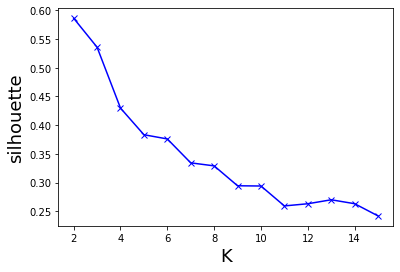

In [13]:
from sklearn.metrics import silhouette_score

def get_silhouette_scores(points):
  scores = []
  for k in range(2, 16):
     km, labels = cluster_points(points, K=k)
     s_score = silhouette_score(points,  km.labels_)
     scores.append((k, s_score))
  return np.array(scores)


sscores = get_silhouette_scores(points)
plot_scores(sscores, y='silhouette')

#**High Score Wins**

![](https://drive.google.com/uc?export=view&id=1_4GxXV4fX3JumySB7lH603vST5MQne-X)

Your graph should look similar to the following image to the left. Looking at the graph, it seems that having only 2 clusters performs well.


In other analysis, you may see a graph similar to the following, where the silhouette score peaks at a certain K (K=3). Even when seeing this result, it would be wise to try both k=3 and k=4 yourself.

![](https://drive.google.com/uc?export=view&id=1LlJb-ruHtafRaGbwCuBMbz3oQQ_b-zTP)



#**Additional Metrics**

**Dunn Index**

Dunn index is another metric by using which we can effectively evaluate the quality of clustering. The following metric basically represents a ratio between the minimum of inter- cluster distances and the maximum of intra-cluster distances. Unlike the inertia value, the Dunn index magnitude largely depends on the distance between clusters. In the most cases, to provide a high-quality clustering we want to maximize the Dunn index value

$Dunn_{index} = min\{inter - cluster\ distances\} \bigg/ max\{intra - cluster\ distances\}$


Want to maximize the Dunn Index:
* as clusters spread apart: numerator grows
* as clusters become dense/compact: denominator shrinks


#**Special K=3**
For our purposes, we will choose K=3. The silhouette score doesn't drop too much and it gives us a little more visual information to discuss.

[[0.3803278  0.60689655 0.29628936 0.28052572 0.45009074 0.46563063]
 [0.1035178  0.19844961 0.17096394 0.52277816 0.43288454 0.20359404]
 [0.73112648 1.         0.62411868 0.13594742 0.65362731 0.73075602]]
3 {0, 1, 2}


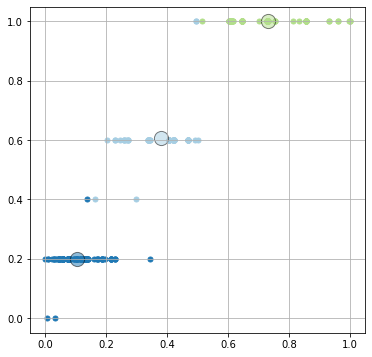

In [14]:
def special_k():
    km, labels = cluster_points(points, K=3)
    print(len(km.cluster_centers_), set(labels))
    plot_kmeans(points, km.cluster_centers_, labels)

special_k()

Re-run your model using k=[2,3,4]. Decide which you think better fits the data.

[[0.18004706 0.31160221 0.20450997 0.45440401 0.43820878 0.27553842]
 [0.71159561 0.98       0.60509511 0.14402322 0.6375     0.71842125]]
2 {0, 1}


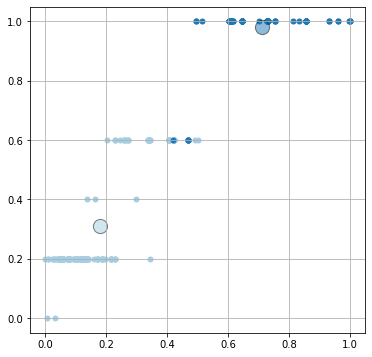

In [15]:
def special_k():
    km, labels = cluster_points(points, K=2)
    print(len(km.cluster_centers_), set(labels))
    plot_kmeans(points, km.cluster_centers_, labels)

special_k()

[[0.38414424 0.61052632 0.29605263 0.28051002 0.44967682 0.46749023]
 [0.14436605 0.19677419 0.23991935 0.39945568 0.47283531 0.27519446]
 [0.06714546 0.20294118 0.11013427 0.63166988 0.39705882 0.140606  ]
 [0.73112648 1.         0.62411868 0.13594742 0.65362731 0.73075602]]
4 {0, 1, 2, 3}


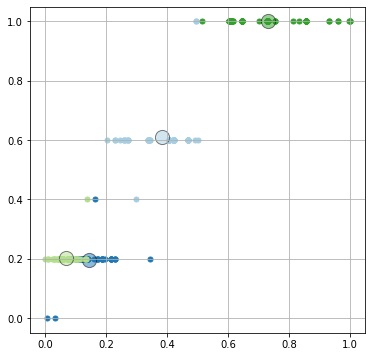

In [16]:
def special_k():
    km, labels = cluster_points(points, K=4)
    print(len(km.cluster_centers_), set(labels))
    plot_kmeans(points, km.cluster_centers_, labels)

special_k()

Re-run your model using k=[2,3,4]. Decide which you think better fits the data.

#**More than 2 Dimensions**

![](https://drive.google.com/uc?export=view&id=1docL9aPzSTo4iZhjP0YaU-ir0DFvYMO3)

Don't forget (it's easy to when looking at the graphs) that the K-means is actually doing it's best to separate the clusters in high dimensional space.

The animation shown is selecting just a few of the possible combinations to plot.

You can actually graph any two dimensions and plot them to see where the centers lie!

```
# you can pick any two to plot too
attributes = data_df.columns.tolist()
x0 = attributes.index('mpg')
x1 = attributes.index('time-to-60')
plot_kmeans(points, km.cluster_centers_, labels, x0,x1, attributes)
```

Index(['cubicinches', 'cylinders', 'hp', 'mpg', 'time-to-60', 'weightlbs'], dtype='object')


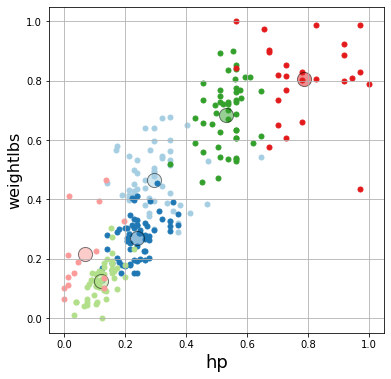

In [20]:
attributes = data_df.columns.tolist()
print(data_df.columns)
x0 = attributes.index('hp')
x1 = attributes.index('weightlbs')
plot_kmeans(points, km.cluster_centers_, labels, x0,x1, attributes)

#**Moving Centers, a look into how K-means works**

![](https://drive.google.com/uc?export=view&id=1A_b0t_ITbQNUw4RJYWKLoH1cmUgErAPF)

When the K•Means algorithm initializes, the default algorithm picks random center points and slowly adjusts them. You can see this happening in the animated picture.

The points change colors as the cluster assignment changes. Around iteration 10, the cluster centers become stable (k=4). Also, the algorithm was initialized with very poor centers to make the moving centers obvious.

KMeans can be initialized with random points (the default), specific centers or with the value 'k-means++' which attempts to select centers biased towards diversity (by spreading the initial centers evenly).

```
km = KMeans(n_clusters=K, init='k-means++')
 ```

#**External Measures for Cluster Evaluation**

The previous validation metrics ('elbow', silhouette, Dunn) are about assessing the internal 'goodness' of the cluster. They help identify the ideal number of clusters.

In external clustering validation, the focus is on evaluating the quality of the resulting clusters. It is used to select suitable clustering algorithm for a given data set or for comparing different clustering algorithms on the same dataset.

#**Scoring against a labeled dataset**

You can also use K•means with labeled data. You can use the labeled column to help score how well your model fits the underlying independent variables. The idea would be to look at each point and compare the true label it to the cluster label the model predicated. Having this count would be a good metric to compare models built with different hyper-parameters.

For the car dataset, there are 3 manufacturers: US, Japan, Europe. We can see how which instances get assigned to which clusters:

In [21]:
def get_distributions(df, points, K=3):
    km, labels = cluster_points(points, K=K)
    centers = km.cluster_centers_

    score = [{} for i in range(0, len(centers))]
    for idx, cluster_num in enumerate(labels):
        predict = cluster_num
        actual = df['brand'][idx]
    
        s = score[predict]
        v = s.get(actual, 0)
        s[actual] = v + 1

    return score
    

km, labels = cluster_points(points, K=3)
cars_df = build_dataset(as_is=True)
print(cars_df.groupby(['brand']).size())
print(get_distributions(cars_df, points, K=5))

[[0.3803278  0.60689655 0.29628936 0.28052572 0.45009074 0.46563063]
 [0.1035178  0.19844961 0.17096394 0.52277816 0.43288454 0.20359404]
 [0.73112648 1.         0.62411868 0.13594742 0.65362731 0.73075602]]
brand
0    161
1     48
2     52
dtype: int64
[[0.3821446  0.60357143 0.29512811 0.28068891 0.44924812 0.46659308]
 [0.66593535 1.         0.54511895 0.15316012 0.62562066 0.68252375]
 [0.14436605 0.19677419 0.23991935 0.39945568 0.47283531 0.27519446]
 [0.87749589 1.         0.80187747 0.10059613 0.71291866 0.83726897]
 [0.06714546 0.20294118 0.11013427 0.63166988 0.39705882 0.140606  ]]
[{1: 3, 0: 48, 2: 5}, {0: 53}, {2: 16, 1: 22, 0: 24}, {0: 22}, {1: 23, 0: 14, 2: 31}]


Below is how to interpret the output (your cluster labels may be different):

```

brand
0    161  US Cars
1     48  Europe Cars
2     52  Japan Cars
{0: 74},                  Cluster 0 (all US Cars 74/161)
{1: 4, 0: 49, 2: 5},      Cluster 1 (most US Cars 49/161)
{2: 47, 1: 44, 0: 38}     Cluster 2 (equally shared)

US:      most in cluster 0, 74/161; rest split into 1, 2
Europe:  most in cluster 2  44/48
Japan:   most in cluster 2  47/52

```

One interesting note that even if you adjust K (3,4,5), the clusters don't separate enough to predict the country of origin. Perhaps if you put the brand back into the cluster analysis, this might change.

So in this case, the manufacturing label doesn't correspond closely with the clusters.

#**Adjusted Rand Index**

A more systematic way to evaluate the performance of a clustering algorithm (assuming you have the true labels) is the adjusted Rand index. It is a function that measures similarity between the labels (acting as the 'truth') and the predicted values (e.g. the labels). You can [read the details](https://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-score). The adjusted Rand index has the maximum value 1, and its expected value is 0 in the case of random clusters (ie poor clustering). The index will be less than 0 if the result is less than the expected result.

In [22]:
import sklearn.metrics as metrics
labels_true = ['a','a','a',  'b','b','b']
labels_pred = [0,0,0, 1,1,1]
print(metrics.adjusted_mutual_info_score(labels_true, labels_pred))

1.0


As you can see, the 'truth' labels do not have to correspond to what the clustering algorithm is using for cluster labels.

We can use this metric to see if our car clusters do a good job at predicting the brand assignment:

```
score = metrics.adjusted_rand_score(cars_df['brand'].values, labels)
print('Index score', score)
```

As you can see this score confirms our intuition discussed above.

In [23]:
score = metrics.adjusted_rand_score(cars_df['brand'].values, labels)
print('Index score', score)

Index score 0.11170549262860915


#**More than one way to cluster**

#**Limitations**

K-means works well in most situations, but it's important to understand when it will fail:
* Data that's not linear separable. If you can't draw a line to separate the clusters, K- means will not work well. Concentric/Circular and spectral clusters cannot be properly separated.
* Data that has no clusters. If all your data is uniform, there's no clusters. However, K- means will still find the centers of those points.
* You pick the wrong K.
* The metric is based on distance, it can't find non-distance based relationships. 
* You forget to properly scale your attributes.

![](https://drive.google.com/uc?export=view&id=1F7u2cCfoWYyPKIeLOdiKEhpppz1qWPIV)

#**Beyond K-means**

![](https://drive.google.com/uc?export=view&id=1T8J7joRYY5z_P9j_pNzsjvKM1yHH1f4P)

The topic of clustering is rich with research and algorithms. There are many different types of spatial clustering methods, including:
* Partitioning methods (including K-means)
* Hierarchical clustering (builds by merging)
* Fuzzy clustering (allows partial classification) • Density-based clustering (neighborhoods of points -- can find unique/nonlinear shapes)
* Model-based clustering (assumes data is coming from a model of distributions)

Popular algorithms include:

* EM (Expectation Maximization) similar to K-
means, but uses statistical methods (probability)
to find the likelihood of an observation belonging
to a cluster.
* Mean-Shift Algorithm. Works by sliding windows.
* DBSCAN (Density Based Spatial Clustering of Applications with Noise). You can find circular and spectral clusters.
* Hierarchical Clustering which builds hierarchies of information.

You can even change the algorithm that KMeans uses internally (see algorithm parameter) There's a lot more to learn but this lesson gives you the background and vocabulary to incorporate other clustering algorithms in your own projects and research.

#**Lesson Assignment**
#**ROBO-Batter**

![](https://drive.google.com/uc?export=view&id=1lvyL9bp9Ri7rqsnDyqDMy-DiYMuh6stP)

In this lesson, you have been hired to program an artificial intelligent baseball batter (robo-agent).

Before each game, the robo-agent will be programmed based on who will be pitching. Your job is to run KMeans on the baseball pitching data and pick out the two factors that best separates the type of pitch that is being
thrown. As a hitter, if you know the pitch type, you have enough information to adjust your bat swing to get a hit. 

So robo-agent will instantaneously be able to measure the two factors you pick as the ball leaves the pitcher's hand. It will know what pitch is coming (hopefully -- based on your expertise) and make the necessary adjustments to get a hit.

#**The Data**
In a previous lesson we worked with some baseball data. The dataset has been anonymized and has the only measurements that robo-agent can detect. Let's take a look:

In [26]:
import pandas as pd
def get_robo_dataset():
  path = 'robo.csv'
  df = pd.read_csv(path)
  return df
pitcher_df = get_robo_dataset()
pitcher_df.head()

,a,b,c,d,e,f
0,-1.504577,54.993072,6.927464,86.9,5.5,2560.0
1,-1.427146,54.849458,7.063881,94.0,5.7,2520.0
2,-1.418858,54.889659,6.952980,94.8,5.6,2618.0
3,-1.579721,55.387799,6.721339,80.4,5.1,3012.0
4,-1.596243,55.058817,6.936298,94.6,5.4,2663.0


It's output should be as follows:
```
       a	     b	       c	      d	   e	   f
0	-1.504577	54.993072	6.927464	86.9	5.5	2560.0
1	-1.427146	54.849458	7.063881	94.0	5.7	2520.0
2	-1.418858	54.889659	6.952980	94.8	5.6	2618.0
3	-1.579721	55.387799	6.721339	80.4	5.1	3012.0
4	-1.596243	55.058817	6.936298	94.6	5.4	2663.0
```



#**The Pitcher**
In this situation we know the pitcher has only 4 different types of pitches: Fast Balls, Curve Balls, Sliders, and Change Ups.

#**Robo Batter**
You can pick any two columns to work with (the agent only has two sensors). You will cluster all the pitches using those two dimensions. The goal is to have separate homogeneous clusters (as much as possible).

#**Step 1**
**Experiment**

Work through this dataset, much like we did for the car data. Determine all the things you need to eventually cluster the data. You will want to analyze, visualize, hypothesis and test. Before you move to step 2, you will want to know all the details of how to solve this problem using functions.


#**Step 2**
**Robo-Classes**

Your solution will be written as a Python class RoboBatter. The entire solution must run using your class design. You will make most of the design decisions; However, here's how your class must work:

```
path_to_data = 'robo.csv'

# the constructor takes a string (a path to the data file)
robo_batter = RoboBatter(path_to_data)

# the method cluster_pitches performs K-means on the data set
# it returns the model and the labels
km, labels = robo_batter.cluster_pitches()

# both km and labels are the only required attributes
km = robo_batter.km
labels = robo_batter.labels
```

Note that this is a good technique to use when you first learn how to create classes. Start with how the classes will be used (or how you want them to be used) and then fill out the details. It's a top down approach to software development.

You can use other classes as well; but the API (how people will use your RoboBatter class is shown above.



          a         b         c         d         e         f
0  1.027931  1.006992 -0.080633 -0.469346 -1.023354 -0.196497
1  1.407756  0.560277  0.873821  0.764422 -0.403893 -0.395559
2  1.448411  0.685322  0.097890  0.903439 -0.713623  0.092143
3  0.659326  2.234805 -1.522799 -1.598852 -2.262276  2.052907
4  0.578285  1.211494 -0.018827  0.868684 -1.333084  0.316088


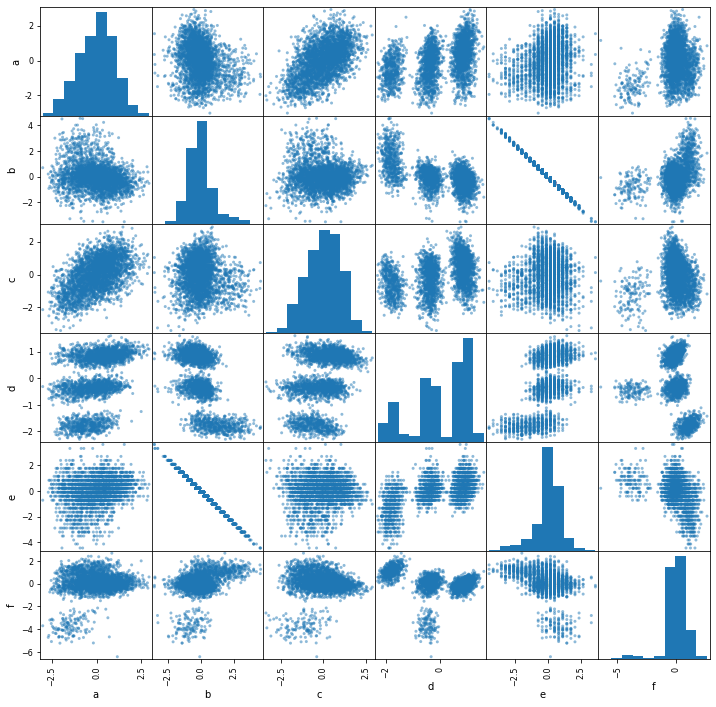

In [32]:
#Step 1 

from sklearn.preprocessing import scale

def show_missing(df):
  print(df.isna().sum())

def fare_z_scaled(df):
  df['a'] = scale(df['a'])
  df['b'] = scale(df['b'])
  df['c'] = scale(df['c'])
  df['d'] = scale(df['d'])
  df['e'] = scale(df['e'])
  df['f'] = scale(df['f'])
  return df

pitcher_df = fare_z_scaled(pitcher_df)

print(pitcher_df.head())

pair_wise_plots(pitcher_df)

## From the pari-wise plot we can conlcude:

1. The two columns d & f could be used for clustering as they show four near homogeneous disribution of data 

2. Columns a & c have near normal distribution

In [61]:
# Step 2 Creating the classes 

path_to_data = 'robo.csv'


class RoboBatter(object):
    def __init__(self, path):
        self.df = pd.read_csv(path)
        self.df['d'] = scale(self.df['d'])
        self.df['f'] = scale(self.df['f'])
        drop = ['a', 'b', 'c', 'e']
        self.df = self.df[self.df.columns.difference(drop)]
        p = []
        for c in self.df.columns:
            pc = self.df[c]
            p.append(pc)

        self.points = np.stack(p, axis=1)
        self.km = KMeans(n_clusters=4,
                         max_iter=300,
                         n_init=100,
                         init='random',
                         random_state=42,
                         tol=0.0001)

        self.km.fit(self.points)

        self.centers = self.km.cluster_centers_
        self.labels = self.km.predict(self.points)

    def cluster_picthes(self):
        return self.km, self.labels

    

In [68]:

robo_batter = RoboBatter(path_to_data)

km, labels = robo_batter.cluster_picthes()


In [70]:
import LessonUtil as Util

tester = Util.RoboTester(robo_batter)
print(tester.get_distributions())
print(tester.rand_index_score())

[{'SL': 926, 'CH': 1, 'FF': 1}, {'CH': 135, 'SL': 2}, {'CU': 560}, {'FF': 1615}]
0.9976382283143631


### **Point Totals**

The total points is based on how well the final clustering performs (based on the rand index score).

* The tests print out the rand score of your clustering algorithm -- although you should calculate it yourself.
* For the lesson, 20 points are based on the performance. So even for an poor clustering job, can get you 80 total points.

##**Extra Credit**

Note that extra credit is only available if the rand index > 0.90.

Add the method predict_pitch to your RoboBatter class. The method takes an array of measurements (in the same order as the columns of the data). And returns the abbreviation (shown below) for the pitch type. It will be called only after the cluster_pitches method has been called.

It is used like this:

```
p42 = "-1.5355167705159802,55.0975543168299,7.04587405132267,93.6,5.4,2588.0".split(',')
p42 = [float(v) for v in p42]

# testing the classifier
robo_batter.cluster_pitches()
pitch_type = robo_batter.predict_pitch(p42)
print(pitch_type == 'FF')
```

You can use the following abbreviations and knowledge of the distribution of pitch types (to help identify your cluster labels).

```
Pitch Type   Abbreviation     Count 
Fast Balls      FF            1617 
Sliders         SL             929 
Curve Balls     CU             560 
Change Ups      CH             136 
```

**Steps to submit your work:**


1.   Download the lesson notebook from Moodle.
2.   Upload any supporting files using file upload option within Google Colab.
3.   Complete the exercises and/or assignments
4.   Download as .ipynb
5.   Name the file as "lastname_firstname_WeekNumber.ipynb"
6.   After following the above steps, submit the final file in Moodle





<h1><center>The End!</center></h1>